In [290]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from matplotlib.pyplot import imshow
import pandas as pd
import seaborn as sb

### Load Data

In [242]:
numcat = 6 #number of categories
categories = ['AbdomenCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'HeadCT']

In [243]:
# directory = r'./Medical_MNIST/'
# train, test = [], []
# for i in range(numcat):
#     imagearray = []
#     for image_raw in os.listdir(directory + categories[i]):
#         image_np = (np.array(Image.open(os.path.join(directory + categories[i], image_raw))).flatten())
#         image = np.append(image_np, i)
#         imagearray.append(image.astype('uint8'))
#     train += imagearray[0:int(0.8*len(imagearray))]
#     test += imagearray[int(0.8*len(imagearray)):]
# # data = np.array(imagearray)
# train = np.array(train)
# test = np.array(test)


In [244]:
# #saving data for faster loading in future
# np.save('Medical_train.npy', train)
# np.save('Medical_test.npy', test)

In [245]:
# For now we are using only a subset of train and test data
# trainsub = 40000
# testsub = 5000

In [246]:
train = np.load('Medical_train.npy')
test = np.load('Medical_test.npy')
#shuffle train and test sets
np.random.shuffle(train)
np.random.shuffle(test)
#splitting into x and y - for both train and test sets
# X_train, y_train = train[:trainsub, :-1], train[:trainsub, -1]
# X_test, y_test = test[:testsub, :-1], test[:testsub, -1]
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [247]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(47163, 4096) (47163,) (11791, 4096) (11791,)


### cross validation

In [248]:
# def cross_valid_split(dataset, folds):
#         dataset_split = []
# #         df_copy = dataset
#         fold_size = int(dataset.shape[0] // folds)
        
#         # for loop to save each fold
#         for i in range(folds):
#             fold = []
#             # while loop to add elements to the folds
#             while len(fold) < fold_size:
#                 # select a random element
#                 r = randrange(df_copy.shape[0])
#                 # determine the index of this element 
#                 index = df_copy.index[r]
#                 # save the randomly selected line 
#                 fold.append(df_copy.loc[index].values.tolist())
#                 # delete the randomly selected line from
#                 # dataframe not to select again
#                 df_copy = df_copy.drop(index)
#             # save the fold     
#             dataset_split.append(np.asarray(fold))
            
#         return dataset_split

In [249]:
# directory = r'./Medical_MNIST/'
# image_np = np.array(Image.open(os.path.join(directory + 'AbdomenCT', '000000.jpeg')))
# imshow(image_np/255, cmap = 'gray')
# # img.show()

### Data Visualization(PCA/tSNE)

Learnt the basics of PCA and tSNE from https://www.datacamp.com/community/tutorials/introduction-t-sne.
Code also adapted from the above website only

In [250]:
# def medical_scatter(x, colors):
#     '''Libraries use for this function ONLY'''
#     import matplotlib.patheffects as PathEffects
# #     %matplotlib inline

#     import seaborn as sns
#     '''------------------------------------'''
    
#     sns.set_style('darkgrid')
#     sns.set_palette('muted')
#     sns.set_context("notebook", font_scale=1.5,
#                     rc={"lines.linewidth": 2.5})
    
#     '''----------------------------------------'''
#     # choose a color palette with seaborn.
#     num_classes = len(np.unique(colors))
#     print('Number of unique classes are = {}'.format(num_classes))
#     palette = np.array(sns.color_palette("hls", num_classes))
# #     print(palette)
#     # create a scatter plot.
#     f = plt.figure(figsize=(12, 12))
#     ax = plt.subplot(aspect='equal')
#     sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
#     plt.xlim(-25, 25)
#     plt.ylim(-25, 25)
# #     ax.axis('off')
#     ax.axis('tight')

#     # add the labels for each digit corresponding to the label
#     txts = []

#     for i in range(num_classes):

#         # Position of each label at median of data points.
        
#         xtext, ytext = np.median(x[colors == i, :], axis=0)
# #         print(i, xtext, ytext)
#         txt = ax.text(xtext, ytext, str(i), fontsize=24)
#         txt.set_path_effects([
#             PathEffects.Stroke(linewidth=5, foreground="w"),
#             PathEffects.Normal()])
#         txts.append(txt)

#     return f, ax, sc, txts

### PCA - on full train dataset

In [251]:
# '''The following libraries used only for PCA/tSNE as we are allowed to do so'''
# from sklearn.decomposition import PCA
# import time 

# time_start = time.time()

# pca = PCA(n_components=4)
# pca_result = pca.fit_transform(X_train)

# print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

__Performing the pca, we see that 58 percent of the variance in data is explained by two principle axis only__

In [252]:
# pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

# pca_df['pca1'] = pca_result[:,0]
# pca_df['pca2'] = pca_result[:,1]
# pca_df['pca3'] = pca_result[:,2]
# pca_df['pca4'] = pca_result[:,3]

# print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

__visualization__

In [253]:
# top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

# medical_scatter(top_two_comp.values,y_train) # Visualizing the PCA output

### tSNE

In [254]:
# #using a subset of the train data
# x_subset = X_train
# y_subset = y_train
# # x_subset = X_train[0:10000]
# # y_subset = y_train[0:10000]
# print(y_subset.shape)
# print(np.unique(y_subset))

In [255]:
# '''The following libraries used only for PCA/tSNE as we are allowed to do so'''
# from sklearn.manifold import TSNE
# import time
# time_start = time.time()

# medical_tsne = TSNE(random_state=2).fit_transform(x_subset)

# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [256]:
# medical_scatter(medical_tsne, y_subset)

In [257]:
# print(medical_tsne.shape)

# Strategy 1: PCA
### Do PCA on full dataset (X_train + X_test combined) and get result in low dimension. Then on the obtained features carry out all algorithms like bayes, naive bayes etc etc

In [261]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=4)
# print(X_train.shape)
# assert(np.concatenate((X_train,X_test), axis = 0).shape == (X_test.shape[0]+X_train.shape[0], X_test.shape[1]))
pca_result = pca.fit_transform(X_train)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 43.32866835594177 seconds


In [262]:
print(pca_result.shape)
print(pca_result[0:10])

(47163, 4)
[[-2532.78602821  -155.27708548  1231.97179592  -222.08964281]
 [-2722.09847457 -2203.49878297  -241.92459223  1657.01372813]
 [-4825.66717064  1283.80540494  -800.68509105  -332.89020327]
 [  929.67407124  1051.34987236    48.64450198   758.47118934]
 [-1485.48784961 -2672.42960111   965.88586105   980.26608595]
 [ 4065.61817997  -568.02804705 -2657.80349415  -310.04398753]
 [-2579.32108396   -10.29898681   922.0638608   -181.96157075]
 [ 4550.76824003 -1236.29263679 -1476.02979243  -479.25563452]
 [ 2541.83974176  1360.58137541   285.68348135   561.03619201]
 [-1998.61357951  -458.41596202  1766.01636535  -493.84618587]]


In [263]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.46913582 0.11218636 0.05130604 0.03566176]


In [266]:
#apply the pca transform to the test data

test_pca = pca.transform(X_test)

#we are doing it for 2 pca components only currently
#we will also normalize the data to make mean 0 and std 1 for the columns

def normalize(x):
    return (x-x.mean(axis = 0))/(x.std(axis = 0))

X_train_pca = normalize(top_two_comp.values)
X_test_pca = normalize(test_pca[:,[0,1]])

#NOTE:Y_train and y_test remain same as before
print(X_train_pca.shape, X_test_pca.shape)
print(X_train_pca.mean(axis = 0))
# print(X_train_pca[0:10])

(47163, 2) (11791, 2)
[-1.92840723e-17 -1.98866996e-17]


Number of unique classes are = 6


(<Figure size 864x864 with 1 Axes>,
 [Text(1230.238266313433, 1053.1815239436396, '0'),
  Text(-4328.753079570709, 1206.0462135354612, '1'),
  Text(2433.800936786606, 1357.6072545334086, '2'),
  Text(3944.6032570808875, -1276.4744954314403, '3'),
  Text(-1991.8216056746992, -2440.96551899674, '4'),
  Text(-2220.3634184341627, -77.02381738804135, '5')])

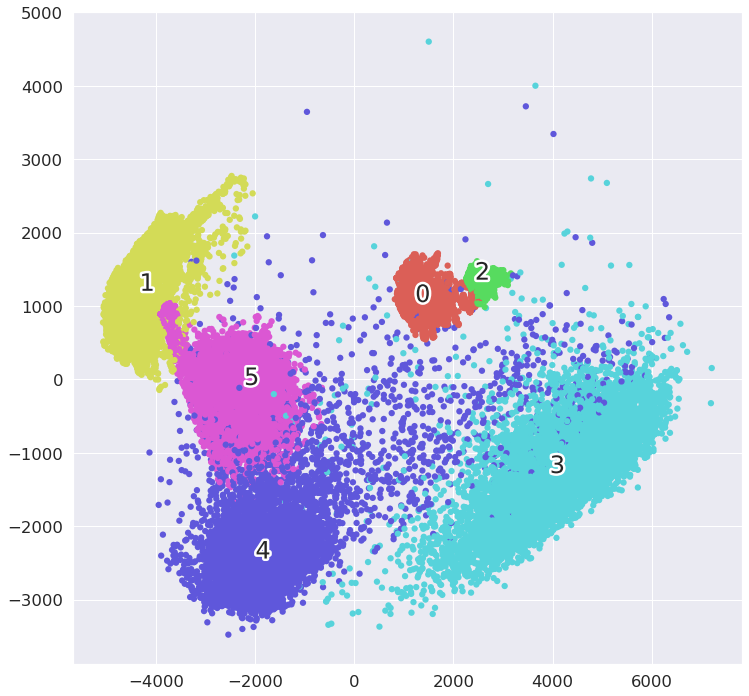

In [268]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

medical_scatter(top_two_comp.values,y_train) # Visualizing the PCA outputa

# Naive Bayes Classifier on PCA data - with Gaussian or some other density functions as density estimates of individual features for a particular class

### MLE

In [333]:
def get_naive_params(X, y):
    params = []
    for i in range(numcat):
        mu = np.mean(X[np.where(y == i)], axis = 0)
        var = np.var(X[np.where(y == i)], axis = 0)
#         print(mu.shape, var.shape)
        assert(mu.shape == var.shape and mu.shape == (X.shape[1],))
        params.append({'mu':mu, 'var':var})
    return params

def performance_metrics_multiclass(y_pred_test, y_test, num_class):
    '''gives the TPR, FPR, acc, precision, recall and F1 score for all classes by comparing the 2 input arrays'''
    #First we calculate the confusion matrix of size num_class*num_class
    #NOTE: Y axis of matrix will be predicted class and x axis wll be true class
    conf_mat = np.zeros((num_class, num_class))
    
    for i in range(num_class):
        for j in range(num_class):
            conf_mat[i, j] = np.logical_and(y_pred_test == i, y_test ==j).sum()
    # Calculating precision, recall, F1 Score for each class
    colnames = ['class', 'Precision', 'Recall', 'F1']
    df = pd.DataFrame(columns = colnames)
    for i in range(num_class):
        TP = conf_mat[i, i]
        FP = conf_mat[i].sum() - conf_mat[i, i]
        TN = conf_mat.sum() - conf_mat[i].sum() - conf_mat[:, i].sum() +  conf_mat[i, i]
        FN = conf_mat[:, i].sum() - conf_mat[i, i]
        P = (TP)/(TP+FP)
        R = (TP)/(TP+FN)
        F1 = 2*P*R/(P+R)
        df = df.append({'class':categories[i], 'Precision':P, 'Recall':R, 'F1':F1 }, ignore_index = True)
    macroF1 = df['F1'].mean()
    accuracy = (y_pred_test==y_test).mean()
    
    # NOTE : returning the transpose of the confusion matricx to get true labels on the y axis
    conf_mat = conf_mat.T
    # NORMALIZING the confusion matrix
    conf_mat = np.around(conf_mat/(conf_mat.sum(axis = 1)), decimals = 3)
    
    
    #PLot the matrix
    ax = sb.heatmap(conf_mat, cmap = sb.light_palette("seagreen", as_cmap=True), xticklabels = categories, yticklabels = categories, annot = True, annot_kws={"size": 10})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    return conf_mat, df, macroF1, accuracy

def getpriors(y_train):
#     priors = [X_train_0.shape[0]/(X_train_1.shape[0] + X_train_0.shape[0]), X_train_1.shape[0]/(X_train_1.shape[0] + X_train_0.shape[0])]
    priors = [(y_train==i).sum()/y_train.shape[0] for i in range(6)]
        
    return priors

def gaussian_univariate(x, mu, var):
    """ to get the value of pdf having scalar params mu and var, @x """
    diff = (x - mu)
    pdf_x = (1/(np.sqrt(2*np.pi)))* (1/np.sqrt(var)) * (np.exp(-0.5*(diff**2)/(var)))
    return pdf_x.item()

def naive_likelihood(x, mu_array, var_array):
    '''mu_array, and var_array are d dimensional array where d is the size of x which is the number of features'''
    likelihood = 1
    for i in range(x.shape[0]):
        likelihood = likelihood * gaussian_univariate(x[i], mu_array[i], var_array[i])
    
    return likelihood
        
def predict_naive(X_test, priors, naive_params):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            assert(X_test[i].shape == (X_test.shape[1],))
            lik = naive_likelihood(X_test[i], naive_params[j]['mu'], naive_params[j]['var'])
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j
    return y_pred_test

In [334]:
# print((y_test<=6).sum())
# print(np.where(X_test_pca[:,0]>=0))

## Cross Validating Naive Bayes

## Testing for Naive Bayes

In [339]:
priors_naive = getpriors(y_train)
naive_params = get_naive_params(X_train_pca, y_train)

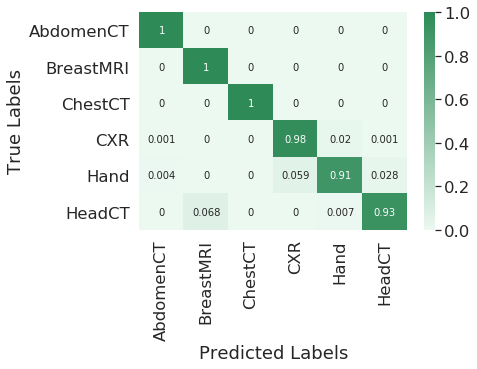

Macro F1 = 0.9690688263572058, Accuracy = 0.969298617589687


,class,Precision,Recall,F1
0,AbdomenCT,0.995025,1.0000,0.997506
1,BreastMRI,0.936715,1.0000,0.967324
2,ChestCT,0.999500,1.0000,0.999750
3,CXR,0.943078,0.9775,0.959980
4,Hand,0.970635,0.9090,0.938807
5,HeadCT,0.970343,0.9325,0.951045


In [338]:
# y_pred_train_naive = predict_naive(X_train_pca, priors_naive, naive_params)
y_pred_test_naive = predict_naive(X_test_pca, priors_naive, naive_params)
conf_mat, stats_df, macroF1, accuracy = performance_metrics_multiclass(y_pred_test_naive, y_test, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1, accuracy))
stats_df

### MAP

# Bayes Classifier - with (multivariate) Gaussian as class conditional densities

TODO : 1.MLE, 2.MAP

### MLE: 

In [356]:
def gaussian_multivariate(x, mu, sigma):
    """ to get the value of pdf having params mu and sigma, @x """
    dim = len(x)
    diff = (x - mu).reshape((-1,1))
    pdf_x = (1/((np.sqrt(2*np.pi))**dim))* (1/np.sqrt(np.linalg.det(sigma))) * (np.exp(-0.5*(diff.T).dot(np.linalg.inv(sigma).dot(diff))))
    return pdf_x.item()

def get_normal(X, y):
    params = []
    for i in range(numcat):
        mu = np.mean(X[np.where(y == i)], axis = 0)
        sigma = np.cov(X[np.where(y == i)].T)
        params.append({'mu':mu, 'sigma':sigma})
    return params
    
def predict_normal(X_test, priors, norm_params):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            lik =  gaussian_multivariate(X_test[i], norm_params[j]['mu'], norm_params[j]['sigma'])
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j
    return y_pred_test

## Cross Validating Bayes

## Testing Bayes

In [357]:
priors_multivariate =  getpriors(y_train)
norm_params = get_normal(X_train_pca, y_train)

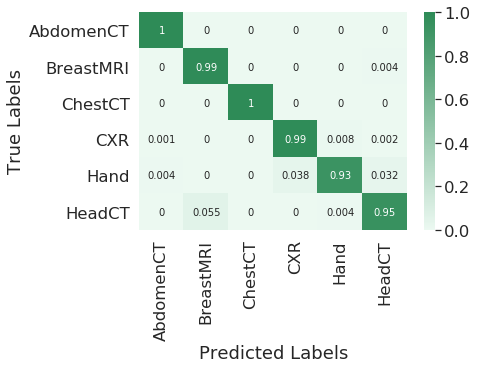

Macro F1 = 0.9755298609296794, Accuracy = 0.9757442116868799


,class,Precision,Recall,F1
0,AbdomenCT,0.995520,1.000000,0.997755
1,BreastMRI,0.947368,0.994975,0.970588
2,ChestCT,0.999500,1.000000,0.999750
3,CXR,0.963017,0.989500,0.976079
4,Hand,0.986681,0.926000,0.955378
5,HeadCT,0.961382,0.946000,0.953629


In [359]:
y_pred_test_normal = predict_normal(X_test_pca, priors_multivariate, norm_params)
conf_mat_norm, stats_df_norm, macroF1_norm, accuracy_norm = performance_metrics_multiclass(y_pred_test_normal, y_test, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm, accuracy_norm))
stats_df_norm
